# Anlisis #Gempa @infoBMKG
&nbsp;
&nbsp;

Pada studi kasus ini kita akan menganalisa mengenai Gempa yang terjadi dari awal tahun 2018 sampai bulan 27 Juli 2020. Data ini bersumber dari akun twitter @infoBMKG yang diambil dengan kata kunci #Gempa. Dalam proses analisis ini kita juga melakukan proses ETL (Extract Transfom Load), ekstrasi data dari twitter kemudian ditransform menjadi format baru sesuai keutuhan lalu disimpan dalam variabel yang telah ditentukan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import collections

File gempaInfo.csv dibaca dengan pandas agar dapat ditampilkan dalam bentuk dataframe. File gempaInfo.csv berisi mengenai informasi gempa yang terjadi di Indonesia, semua data ini dicatat oleh BMKG yang kemudian diposting pada twitter @infoBMKG, data ini diambil dengan rentang waktu 01 Januari 2018 sampai dengan 27 Juli 2020.

In [2]:
df = pd.read_csv("gempaInfo.csv")
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1287560105999777793,1287560105999777793,1595813225000,2020-07-27,08:27:05,WIB,108543358,infobmkg,BMKG,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '108543358', 'username': 'infoBMK...",NaN,NaN,NaN,NaN
1,1287559797538136064,1287559797538136064,1595813152000,2020-07-27,08:25:52,WIB,108543358,infobmkg,BMKG,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '108543358', 'username': 'infoBMK...",NaN,NaN,NaN,NaN
2,1287510275810160640,1287510275810160640,1595801345000,2020-07-27,05:09:05,WIB,108543358,infobmkg,BMKG,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '108543358', 'username': 'infoBMK...",NaN,NaN,NaN,NaN
3,1287509492846845952,1287509492846845952,1595801158000,2020-07-27,05:05:58,WIB,108543358,infobmkg,BMKG,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '108543358', 'username': 'infoBMK...",NaN,NaN,NaN,NaN
4,1287397032592842753,1287397032592842753,1595774345000,2020-07-26,21:39:05,WIB,108543358,infobmkg,BMKG,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '108543358', 'username': 'infoBMK...",NaN,NaN,NaN,NaN


Dari data frame di atas kita dapat melihat nama-nama kolom dengan perintah ```python df.columns ``` .

In [3]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

## Preprocessing
 
Setelah data dapat diekstrak atau dibuka, data yang ada ditransform sesuai dengan kebutuhan analis. Pada tahap ini dipilah lagi tweet yang ada, kita hanya akan mengambil data tanggal pada kolom date, waktu pada kolom time, waktu wilayah pada kolom timezone dan tweet pada kolom tweet, tweet yang diambil hanya tweet yang menginformasikan gempa. Untuk mengetahuinya kita dapat melihat pada tweet apakah ada kalimat '#Gempa Mag:' yang menandakan tweet tersebut menginformasikan kejadian mengenai gempa.

In [4]:
date = []
time = []
timezone = []
text = []
htags = []

for i in range (len(df["tweet"])):
    if df["tweet"][i].find("#Gempa Mag:") != (-1):
        date.append(df["date"][i])
        time.append(df["time"][i])
        timezone.append(df["timezone"][i])
        text.append(df["tweet"][i])

In [5]:
dt = {"Date":date, "Time":time, "Timezone":timezone, "Tweet":text}
ndf = pd.DataFrame(dt)
print(ndf.head())
print(len(ndf))

         Date      Time Timezone  \
0  2020-07-27  08:27:05      WIB   
1  2020-07-27  08:25:52      WIB   
2  2020-07-27  05:09:05      WIB   
3  2020-07-27  05:05:58      WIB   
4  2020-07-26  21:39:05      WIB   

                                               Tweet  
0  #Gempa Mag:5, 27/07/2020 05:01:23 (Pusat gempa...  
1  #Gempa Mag:5.0, 27-Jul-20 05:01:23 WIB, Lok:0....  
2  #Gempa Mag:5.0, 27-Jul-20 05:01:23 WIB, Lok:0....  
3  #Gempa Mag:5.0, 27-Jul-20 05:01:23 WIB, Lok:0....  
4  #Gempa Mag:3.2, 26/07/2020 21:18:14 (Pusat gem...  
7504


Data teks dari kolom tweet kita ambil untuk kita pilah kembali untuk menemukan tweet yang berkaitan dengan pemberitaan gempa bumi yang terjadi, karena belum tentu tweet yang mengandung #Gempa itu memberitakan bencana gempa bisa saja memberitakan informasi tentang apa itu gempa? atau klarifikasi berita gempa. Dalam proses ini kita mencari kalimat "#Gempa Mag:" apabila ada kalimat tersebut maka tweet tersebut memberitakan gempa bumi yang terjadi.
<br>
<br>
Selain itu kita juga akan menambah kolom "Area" yang berisi informasi dimana gempa terjadi.

In [6]:
tweets = ndf["Tweet"]

In [7]:
mag = []
area = []
for x in range (len(tweets)):
    tw = ",".join(tweets.values[x].split("(")[1:len(tweets.values[x])]).split("#BMKG")[0].replace(")","")
    area.append(tw)
    a = tweets.values[x].split(",")
    try:
        a = a[0].split("#Gempa Mag:")[1]
        a = float(a.split(" ")[0])
        mag.append(a)
    except:
        b = tweets.values[x]
        b = b.split(",")
        b = float(b[0].split("#Gempa Mag: ")[1])
        mag.append(b)
        continue
dataMag = np.array(mag)
dataMag = dataMag.astype(np.float64)
dataMag.dtype

print(len(dataMag))

7504


In [8]:
dt.keys()

dict_keys(['Date', 'Time', 'Timezone', 'Tweet'])

In [9]:
ndf["Magnitudo"] = dataMag
ndf["Area"] = area
ndf = ndf.drop(columns = "Tweet")

## Visualisasi dan Analisa

Data yang sudah melalui tahap preprocessing akan menghasilkan seperti tabel di bawah ini. Di sini terdapat 5 kolom yaitu Date, Time, Timezone, Magnitudo dan Area

In [10]:
ndf.head()

,Date,Time,Timezone,Magnitudo,Area
0,2020-07-27,08:27:05,WIB,5.0,Pusat gempa di laut 89 km Timur Laut Nias Sela...
1,2020-07-27,08:25:52,WIB,5.0,Pusat gempa berada di laut 89 km Timur Laut Ni...
2,2020-07-27,05:09:05,WIB,5.0,"89 km TimurLaut NIASSELATAN-SUMUT, Kedalaman:1..."
3,2020-07-27,05:05:58,WIB,5.0,"89 km TimurLaut NIASSELATAN-SUMUT, Kedlmn:10 K..."
4,2020-07-26,21:39:05,WIB,3.2,"Pusat gempa di laut 22 km Barat Laut Lembata, ..."


In [11]:
tgl = []
jumlah = []

counter = collections.Counter(ndf["Date"])
for x in counter.keys():
    tgl.append(x)
for x in counter.values():
    jumlah.append(x)
dt = {"Date":tgl, "Total_Tweets":jumlah}
dfTweet = pd.DataFrame(dt)
dfTweet = dfTweet.set_index(["Date"])
dfTweet = dfTweet.sort_index(ascending = True)
dfTweet.head()

,Total_Tweets
Date,
2018-01-01,5
2018-01-03,2
2018-01-04,6
2018-01-05,5
2018-01-06,6


In [12]:
print("5 Tweet Tertinggi \n")
print(dfTweet.sort_values(["Total_Tweets"],ascending=False).head(),"\n")
print("Total hari \t: ",len(dfTweet),"\n")
print("Banyak Tweet \t: ",dfTweet["Total_Tweets"].sum(),"\n")

5 Tweet Tertinggi 

            Total_Tweets
Date                    
2018-11-15            82
2019-11-15            69
2019-09-26            64
2018-11-09            51
2018-10-02            49 

Total hari 	:  858 

Banyak Tweet 	:  7504 



Selama 858 hari BMKG melakukan tweet sebanyak 7504 tweet mengenai #Gempa, jumlah tweet terbanyak terjadi pada tanggal 15 November 2018 yaitu sebanyak 82 Tweet. 
<br> 
<br>
Di bawah merupakan grafik garis frekuensi tweet setiap harinya selama periode Januari 2018 sampai 27 Juli 2020

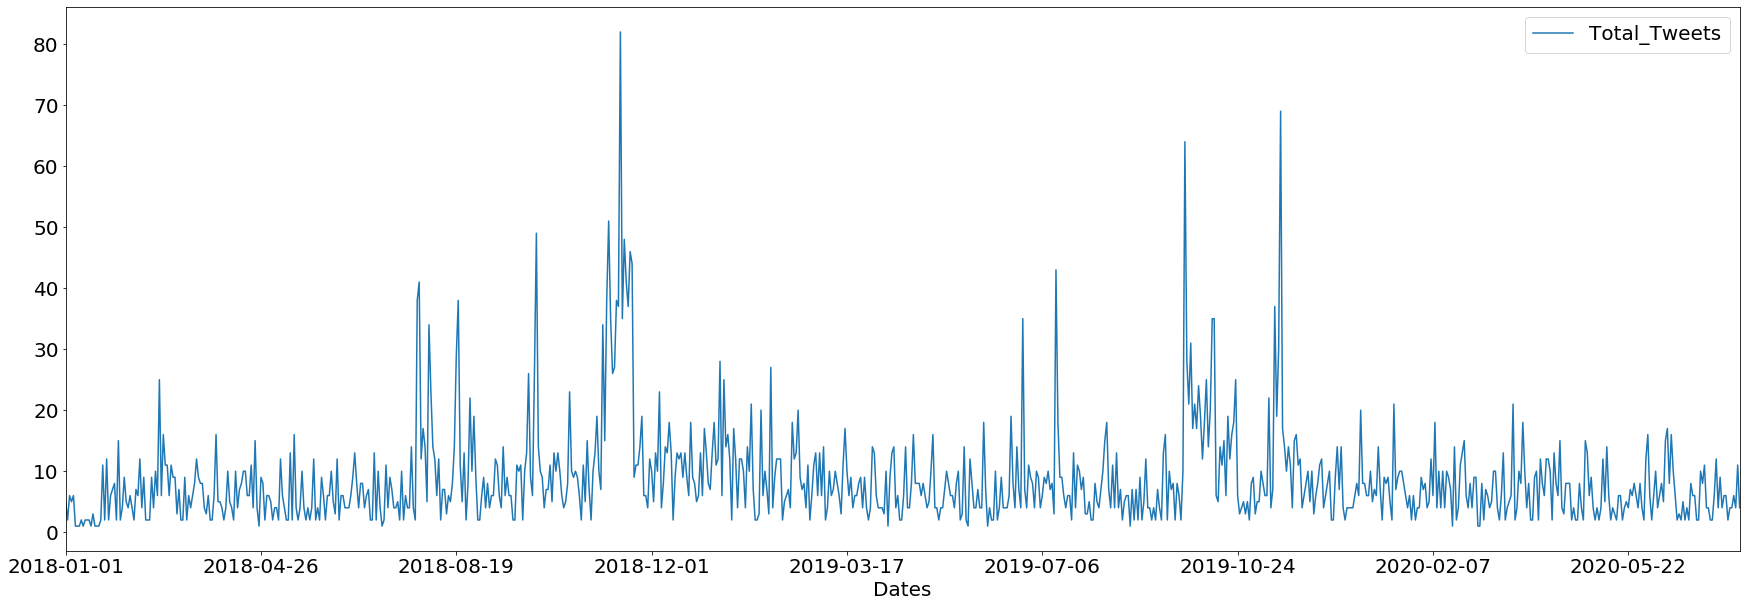

In [13]:
dfTweet.plot(figsize = (30,10))
plt.xticks(fontsize = 20)
plt.xlabel("Dates",fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

In [14]:
print("mean \t:",ndf["Magnitudo"].mean())
print("media \t:",ndf["Magnitudo"].median())
print("mode \t:",ndf["Magnitudo"].mode())

mean 	: 4.323960554370998
media 	: 4.5
mode 	: 0    5.0
dtype: float64


Mencari gempa dengan magnitudo si atas 7 skala richter dengan menseleksi data frame pada kolom Magnitudo

In [15]:
areaMag = ndf[ndf["Magnitudo"]>=7]
areaMag

,Date,Time,Timezone,Magnitudo,Area
45,2020-07-17,10:03:04,WIB,7.3,"192 km TimurLaut PORTMORESBY-PNG, Kedalaman:87..."
46,2020-07-17,10:01:18,WIB,7.3,"192 km TimurLaut PORTMORESBY-PNG, Kedlmn:87 Km..."
296,2020-06-04,16:18:05,WIB,7.1,"Pusat gempa di laut 89 km BaratLaut Daruba, Ke..."
297,2020-06-04,15:57:05,WIB,7.1,"89 km BaratLaut DARUBA-MALUT, Kedalaman:112 Km..."
298,2020-06-04,15:54:25,WIB,7.1,"89 km BaratLaut DARUBA-MALUT, Kedlmn:112 Km, t..."
442,2020-05-06,21:00:05,WIB,7.3,"180 km BaratLaut MALUKUTENGGARABRT, Kedalaman:..."
443,2020-05-06,20:59:20,WIB,7.3,"180 km BaratLaut MALUKUTENGGARABRT, Kedlmn:133..."
1708,2019-11-15,00:06:22,WIB,7.4,Pusat gempa berada dilaut 134 BaratLaut Jailol...
1709,2019-11-15,00:06:09,WIB,7.4,"Pusat gempa dilaut 134 BaratLaut Jailolo, Kedl..."
1710,2019-11-14,23:36:10,WIB,7.1,"137 km BaratLaut JAILOLO-MALUT, Kedalaman:73 K..."


In [16]:
areaMag.values

array([['2020-07-17', '10:03:04', 'WIB', 7.3,
        '192 km TimurLaut PORTMORESBY-PNG, Kedalaman:87 Km, tidak berpotensi tsunami '],
       ['2020-07-17', '10:01:18', 'WIB', 7.3,
        '192 km TimurLaut PORTMORESBY-PNG, Kedlmn:87 Km, tdk berpotensi tsunami '],
       ['2020-06-04', '16:18:05', 'WIB', 7.1,
        'Pusat gempa di laut 89 km BaratLaut Daruba, Kedlmn:112 Km Dirasakan ,MMI IV Morotai, II-III Manado, II-III Bitung, II-III Minahasa, II-III Ternate, II-III Sitaro, II-III Tahuna, II-III Talaud, II-III Bolaang Mongondow , '],
       ['2020-06-04', '15:57:05', 'WIB', 7.1,
        '89 km BaratLaut DARUBA-MALUT, Kedalaman:112 Km, tidak berpotensi tsunami '],
       ['2020-06-04', '15:54:25', 'WIB', 7.1,
        '89 km BaratLaut DARUBA-MALUT, Kedlmn:112 Km, tdk berpotensi tsunami '],
       ['2020-05-06', '21:00:05', 'WIB', 7.3,
        '180 km BaratLaut MALUKUTENGGARABRT, Kedalaman:133 Km, tidak berpotensi tsunami '],
       ['2020-05-06', '20:59:20', 'WIB', 7.3,
        '180 